#### LogisticRegression classification
##### Just for name is looks like a regression but it classifies the data based on probability. the name of regression came to model basically it uses the linear regression in its formula. 1/1+e^-x
##### The output will be in the form of values between 0 to 1. Normally threshold value will be 0.5. 
##### >0.5 is 1  and <0.5 is 0, but it is not complusory.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
from sklearn.datasets import load_iris
df = load_iris()


In [106]:
X = pd.DataFrame(df.data, columns=df.feature_names)

In [107]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [108]:
y = pd.Series(df.target).map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [109]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: object

In [110]:
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [111]:
y.isna().sum()

0

In [112]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [113]:
y = y.map({'setosa': 0,'versicolor':1 ,'virginica': 2})

In [114]:
X = X[:].values

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0)

In [116]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [117]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga',multi_class='multinomial')
log_reg.fit(x_train,y_train)


LogisticRegression(l1_ratio=0.5, multi_class='multinomial',
                   penalty='elasticnet', solver='saga')

In [118]:
y_pred = log_reg.predict(x_test)

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[32  1  0]
 [ 0 34  0]
 [ 0 10 28]]


<Axes: >

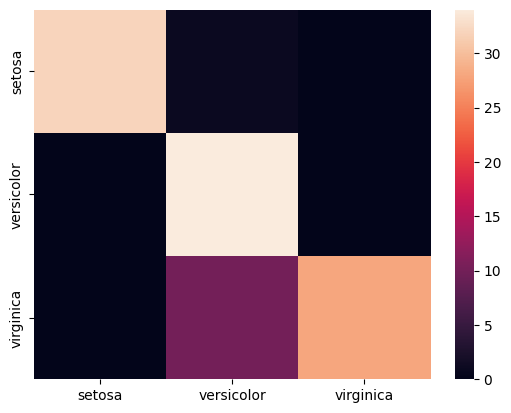

In [120]:
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])

In [121]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)
# 0.8857142857142857

0.8952380952380953
